## <center> Аттестация. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [26]:
import pandas as pd
import numpy as np

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} - x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [27]:
#Создадим DataFrame из csv файла
solar_power_data = pd.read_csv('./solarpower.csv', sep=',')

In [28]:
sp_df = solar_power_data.copy()
display(sp_df.head())

#Заменим пропуски в накопленной энергии средним между 2-мя днями
for i in range(sp_df.shape[0]):
    if sp_df['cum_power'].iloc[i] == -1:
        sp_df['cum_power'].iloc[i] = abs((sp_df['cum_power'].iloc[i-1]+sp_df['cum_power'].iloc[i+1])/2)
        
display(sp_df['cum_power'].value_counts())

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


C:\Users\mish9\.conda\envs\sf\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


24053.0    3
24036.0    2
24048.0    2
24081.0    2
20208.0    2
          ..
23080.0    1
23083.0    1
23103.0    1
23108.0    1
28120.0    1
Name: cum_power, Length: 651, dtype: int64

2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [29]:
sp_df['day_power'] = np.NaN

#Создадим признак накомпленной энергии за день
for i in range(sp_df.shape[0]):
    sp_df['day_power'].iloc[i] = sp_df['cum_power'].iloc[i] - sp_df['cum_power'].iloc[i-1]

#Обнулим значение за 1 января, так как это день начала отсчёта
sp_df['day_power'].iloc[0] = 0
        
#display(sp_df.head(20))

#Выделим месяца из дат
sp_df['mounth'] = pd.to_datetime(sp_df['date']).dt.to_period('M')
#display(sp_df.head(20))

#Получим суммарную выработку энергии по месяцы
sp_mounth = sp_df.groupby(
    by='mounth',
    as_index=False
)['day_power'].sum()

#display(sp_mounth.info())
#display(sp_mounth.head(30))

3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

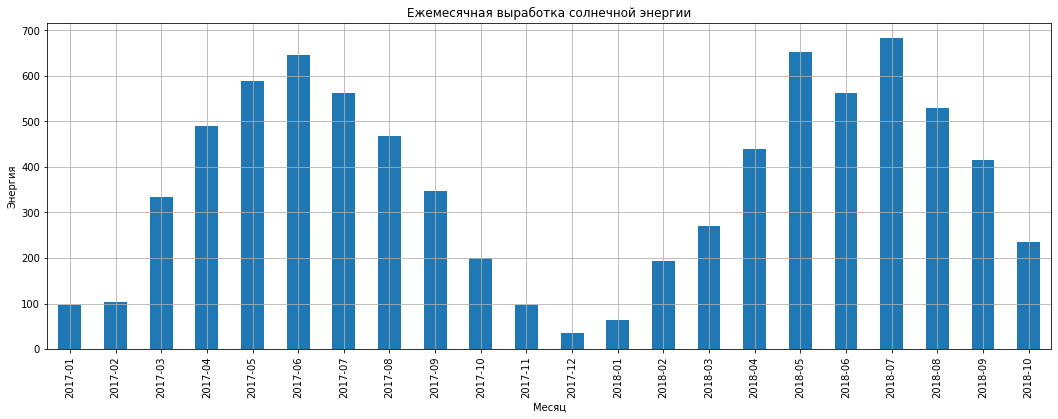

In [30]:
sp_mounth.plot(
    x='mounth',
    y='day_power',
    kind='bar',
    figsize=(18, 6),
    title='Ежемесячная выработка солнечной энергии',
    grid=True,
    legend=False,
    xlabel='Месяц',
    ylabel='Энергия'
);

Судя по графику, можно сделать следующие выводы:
* выработка энергии зависит от сезона;
* выработанная мощность может отличаться в одном и том же месяце от года к году;
* самая большая выработка наблюдается в период апрель-август, так как принимается больше солнечной энергии;
* самая маленькая выработка наблюдается в период октябрь-февраль, так как принимается меньше солнечной энергии.